In [1]:
import warnings

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn

import logging

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# print("TensorFlow v" + tf.__version__)
#print("TensorFlow Decision Forests v" + tfdf.__version__)

In [3]:
dataset_df = pd.read_csv('data-splitted/train_dataset.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (431, 58)


In [4]:
dataset_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,9ef1886b810c,0.252107,6382.61448,410.629350,6.073217,17.952834,4.996476,0.038671,14.689962,9.572136,...,7.020590,2.00158,0.629889,26.706042,72.611063,8776.686879,19.125940,145.114812,0.171564,1
1,ac38de805eff,0.679407,5885.36377,85.200147,9.427268,8.138688,2.294481,0.025578,8.079164,1.229900,...,38.083826,1.35662,0.067730,15.766890,118.826134,384.850764,16.435657,14.158860,0.069015,1
2,0f9257f237b4,0.162374,3245.45474,85.200147,14.469184,8.138688,4.208025,0.038671,8.009842,1.229900,...,6.169800,0.88885,0.331877,17.915652,1228.992706,4256.400636,15.803087,105.475148,7.128000,0
3,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
4,fbd12c4ae88b,0.581128,4268.30888,85.200147,43.212441,11.835708,6.343044,0.025578,7.045636,11.188576,...,0.173229,1.20640,0.196417,17.255210,72.611063,38475.318010,27.766102,133.988340,21.978000,0


In [5]:
dataset_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,431.000000,431.00000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,...,430.000000,431.000000,429.000000,431.000000,431.000000,431.000000,431.000000,431.000000,430.000000,431.000000
mean,0.476117,3476.37516,117.347844,36.493291,9.738576,5.584510,0.042854,10.591249,9.142564,5333.301827,...,5.625919,4.494561,0.440734,20.723140,122.730342,15442.979644,31.845069,48.652089,8.566133,0.162413
std,0.503392,2446.89510,117.710487,59.377952,9.210571,2.676082,0.052045,4.475822,77.206921,2921.550829,...,12.899069,60.021787,1.541592,10.072465,119.919765,20788.437041,9.742185,34.719641,10.329934,0.369258
min,0.081187,192.59328,85.200147,4.617627,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.874248,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2163.96158,85.200147,12.036490,8.138688,4.181448,0.025578,8.139033,1.229900,4153.050190,...,0.173229,0.497060,0.067730,14.501818,72.611063,2794.719186,25.239543,21.591297,0.135034,0.000000
50%,0.350386,3070.40404,85.200147,20.762288,8.138688,5.023053,0.025578,10.442414,1.229900,5066.115430,...,3.024156,1.131000,0.257374,18.669114,72.611063,7863.793713,31.234074,39.927728,0.339429,0.000000
75%,0.540535,4258.15819,115.851472,37.620807,8.138688,6.387339,0.034256,12.988422,5.000422,6043.542118,...,6.115727,1.509740,0.521521,25.408413,125.295935,21548.650970,37.317909,65.893354,21.978000,0.000000
max,6.161666,28688.18766,1817.620554,630.518230,178.943634,38.270880,0.624529,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1228.992706,143790.071200,69.154785,191.194764,21.978000,1.000000


<Axes: ylabel='count'>

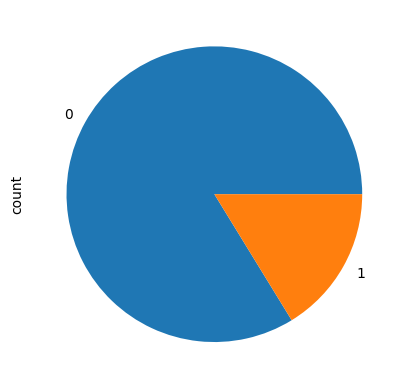

In [6]:
plot_df = dataset_df.Class.value_counts()
plot_df.plot(kind="pie")

In [7]:
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["Id", "EJ", "Class"]]

<Axes: xlabel='EJ', ylabel='count'>

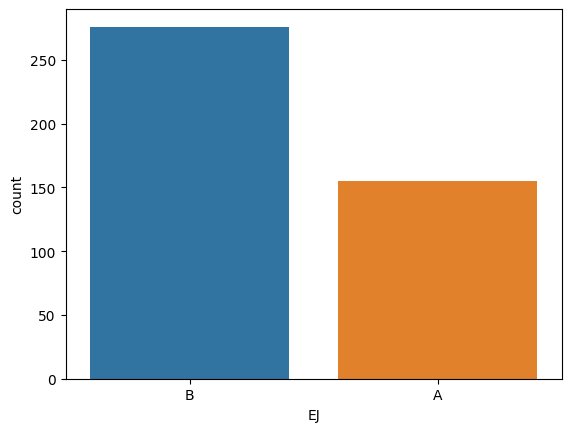

In [8]:
sns.countplot(x='EJ', data=dataset_df)

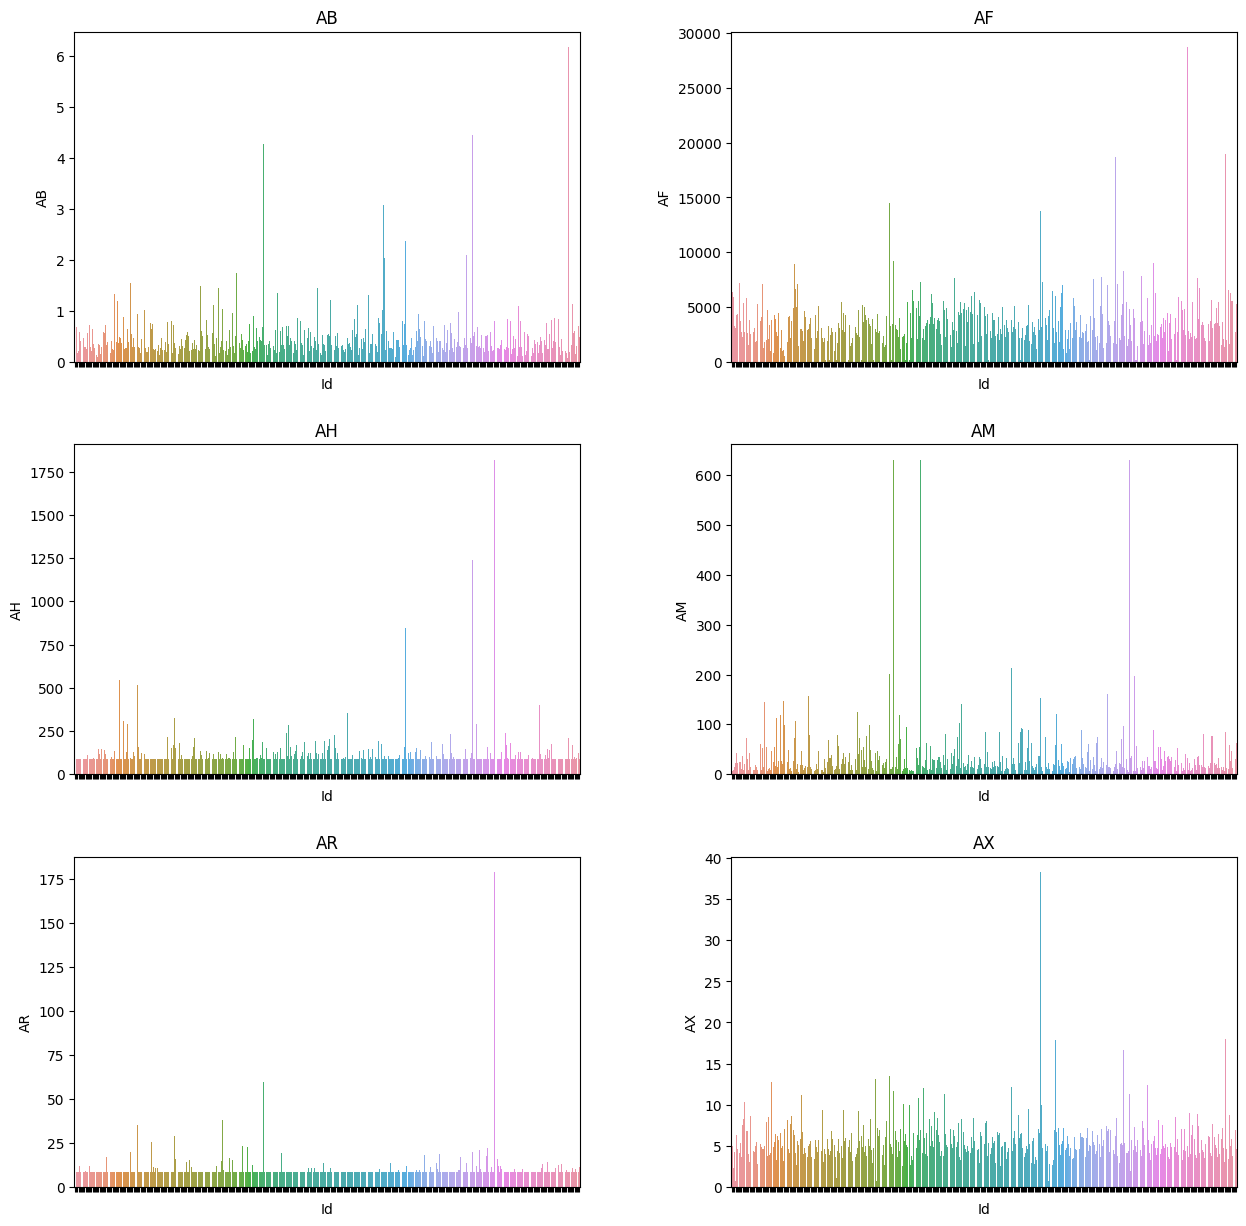

In [9]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[:6]):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axis[row, col], x=dataset_df['Id'], y=dataset_df[column_name])
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()

In [10]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [11]:
X = dataset_df.drop(['Id','Class'], axis =1)
X = X.fillna(0)
y= dataset_df['Class']

In [12]:
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)

In [14]:
classifier = RandomForestClassifier()
classifier.fit(X,y)

RandomForestClassifier()

In [15]:
from sklearn.metrics import classification_report


In [16]:
test_data = pd.read_csv("data-splitted/validate_dataset.csv")

In [17]:
test_data = test_data.fillna(0)
test = pd.get_dummies(test_data.drop(['Id','Class'], axis=1), drop_first=True)
y_pred = classifier.predict(test)
print(classification_report(test_data['Class'], y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       148
           1       1.00      0.71      0.83        38

    accuracy                           0.94       186
   macro avg       0.97      0.86      0.90       186
weighted avg       0.94      0.94      0.94       186



In [18]:
X_train = X
y_train = y
X_test = test
y_test = test_data['Class']

In [19]:
import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn
from sklearn.model_selection import ParameterGrid
import logging

In [20]:
def get_experiment_id(experiment_name):
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment:
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)

In [23]:
def train_models(X_train, X_test, y_train, y_test):
    mlflow.set_tracking_uri("sqlite:///mlflow.db")
    experiment_id = get_experiment_id("age_identify_exp")

    models = [
        {"name": "RandomForest",
         "model": RandomForestClassifier(),
         "parameters": {"n_estimators": [10, 50, 100], "max_depth": [None, 5, 10]}},
    ]
    for model_info in models:
        model_name = model_info["name"]
        model = model_info["model"]
        param_grid = model_info["parameters"]

        for parameters in ParameterGrid(param_grid):
            model.set_params(**parameters)
            with mlflow.start_run(experiment_id=experiment_id):
                model.fit(X_train, y_train)

                predicted_classes = model.predict(X_test)

                accuracy = accuracy_score(y_test, predicted_classes)
                precision = precision_score(y_test, predicted_classes)
                recall = recall_score(y_test, predicted_classes)
                f1 = f1_score(y_test, predicted_classes)

                print(f"{model_name} model (parameters={parameters}):")
                print("  Accuracy: %s" % accuracy)
                print("  Precision: %s" % precision)
                print("  Recall: %s" % recall)
                print("  F1 Score: %s" % f1)

                mlflow.log_param("model_name", model_name)
                mlflow.log_params(parameters)
                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("precision", precision)
                mlflow.log_metric("recall", recall)
                mlflow.log_metric("f1", f1)

                predictions = model.predict(X_train)
                signature = infer_signature(X_train, predictions)

                mlflow.sklearn.log_model(model, f"{model_name}_model", signature=signature)
    

In [24]:
train_models(X_train, X_test, y_train, y_test)

RandomForest model (parameters={'max_depth': None, 'n_estimators': 10}):
  Accuracy: 0.8709677419354839
  Precision: 0.85
  Recall: 0.4473684210526316
  F1 Score: 0.5862068965517242
RandomForest model (parameters={'max_depth': None, 'n_estimators': 50}):
  Accuracy: 0.9139784946236559
  Precision: 1.0
  Recall: 0.5789473684210527
  F1 Score: 0.7333333333333334
RandomForest model (parameters={'max_depth': None, 'n_estimators': 100}):
  Accuracy: 0.9354838709677419
  Precision: 1.0
  Recall: 0.6842105263157895
  F1 Score: 0.8125000000000001
RandomForest model (parameters={'max_depth': 5, 'n_estimators': 10}):
  Accuracy: 0.8978494623655914
  Precision: 0.9130434782608695
  Recall: 0.5526315789473685
  F1 Score: 0.6885245901639344
RandomForest model (parameters={'max_depth': 5, 'n_estimators': 50}):
  Accuracy: 0.9032258064516129
  Precision: 1.0
  Recall: 0.5263157894736842
  F1 Score: 0.6896551724137931
RandomForest model (parameters={'max_depth': 5, 'n_estimators': 100}):
  Accuracy: 0

In [25]:
experiment_id = get_experiment_id("age_identify_exp")
runs = mlflow.search_runs(experiment_ids=[experiment_id])

# Sort by one of the metrics and get the top run
best_run = runs.sort_values("metrics.f1", ascending=False).iloc[0]

params = best_run.loc[[name.startswith("params.") for name in best_run.index]]
metrics = best_run.loc[[name.startswith("metrics.") for name in best_run.index]]

print(params, metrics)

params.max_depth                 10
params.n_estimators              50
params.model_name      RandomForest
Name: 1, dtype: object metrics.f1           0.818182
metrics.precision    0.964286
metrics.accuracy     0.935484
metrics.recall       0.710526
Name: 1, dtype: object


In [26]:
# Sort by one of the metrics and get the top run
best_run = runs.sort_values("metrics.f1", ascending=False).iloc[0]

# Extract the run_id and artifact_uri for the best run
run_id = best_run.run_id
artifact_uri = f"runs:/{run_id}/model"  # The 'model' is the artifact name where the model is saved
print("path", artifact_uri)

path runs:/c4fb2ab1ef604e828b191dd68e9d42cc/model


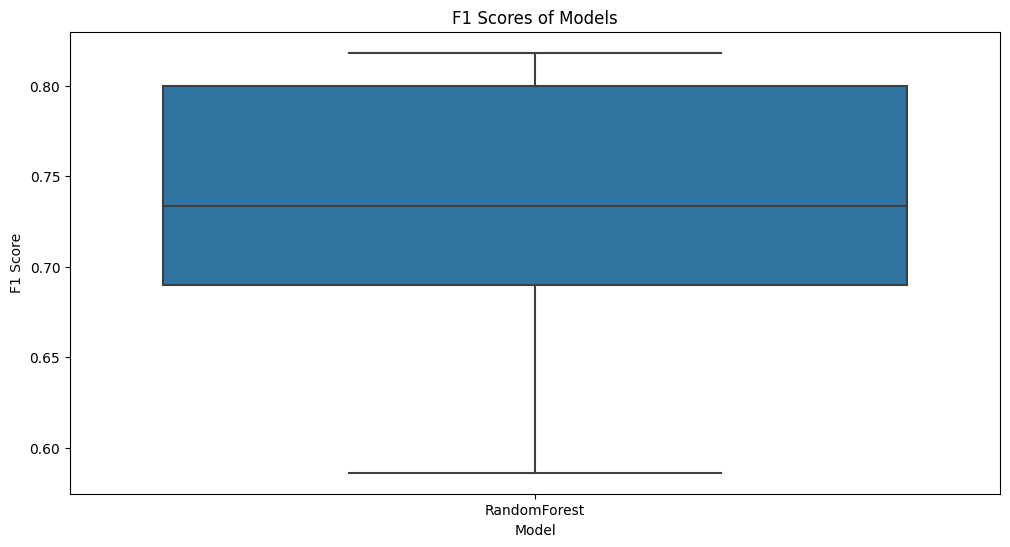

In [27]:
# Create a boxplot for F1 scores of each model
plt.figure(figsize=(12, 6))
sns.boxplot(data=runs, x='params.model_name', y='metrics.f1')
plt.title('F1 Scores of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

In [ ]:
# # Replace 'categorical_features' and 'numerical_features' with the names of your categorical and numerical features
# categorical_features = ['EJ']
# numerical_features = NUM_FEATURE_COLUMNS

# # Define preprocessing steps for categorical and numerical features
# categorical_preprocessor = Pipeline([
#     #('woe_encoding', WOEEncoder()),  # Implement WOE encoding (custom implementation or use a library)
#     ('dummy_encoding', OneHotEncoder(drop='first'), categorical_features)
# ])

# numerical_preprocessor = Pipeline([
#     ('scaler', StandardScaler()),   # Standardize numerical features
#     ('binning', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')),  # Binning
# ])

# # Combine preprocessor steps using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_preprocessor, categorical_features),
#         ('num', numerical_preprocessor, numerical_features)
#     ],
#     #remainder='passthrough'
# )


# # Add oversampling using RandomOverSampler
# #sampler = SMOTE()

# # Define the Random Forest Classifier
# classifier = RandomForestClassifier()

# # Create the final pipeline by combining all steps
# ml_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#    # ('sampler', SMOTE()),
#     ('classifier', classifier)
# ])


In [ ]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# #cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Perform cross-validation and get evaluation scores for each fold
# cross_val_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# # Print the evaluation scores for each fold
# print("Cross-validation scores:", cross_val_scores)

# # Print the mean and standard deviation of the cross-validation scores
# print("Mean accuracy:", cross_val_scores.mean())
# print("Standard deviation:", cross_val_scores.std())
